<center> <h1>
    Project 02:  Stable Orbits in a Saturnian Model System </h1><h2> 2-Electron:1-Proton System in a Time-Dependent Magnetic Field</h2> 
<h4>PHYS 210: Introduction to Computational Physics</h4>
<h4>Ayan Araleh</h4>
<h4>November 25th, 2024</h4>
<h5>Revised on December 2nd, 2024</h5>
 </center>


 
<center> <h3> <b> Introduction to the Study </b> </h3> </center>
This project aims to investigate the motion of charged particles in a combined Coulomb and magnetic field environment by simulating the dynamics of a system consisting of 2 electrons and a stationary proton. The investigation will begin by changing parameters such as initial distance to see if they sustain a stable orbit. This will introduce a more complex investigation by incorporating a time-varying magnetic field that influences the trajectories of the electrons. This investigation will explore concepts such as Lorentz forces, Coulomb interactions, and orbital stability in an attempt to discover which parameters are needed to maintain a stable orbit. This simulation combines classical electrodynamics with computational physics, which will offer insight into how charged particles behave under complex force interactions by modeling the change - or lack there-of - in the electron's orbits over time. 

<center> <h3> <b> Background Information and Formulae </b> </h3> </center>

1. **Coulomb Force**
$$
\mathbf{F}_{\text{Coulomb}} = k \frac{q_1 q_2}{r^2} \hat{\mathbf{r}}
$$
Electrostatic force between two point charges (+q or -q). $\mathbf{r}$ indicates directionality in space. 

2. **Lorentz Force**
$$
\mathbf{F}_{\text{mag}} = q (\mathbf{v} \times \mathbf{B})
$$
Force due to magnetic field on a point charge (+q or -q). Acts perpendicular to direction of velocity and magnetic field. 

3. **Total Energy**
$$
E = KE + U_{E} = \frac{1}{2} m v^2 + (-\frac{k e^2}{r})
$$
Total energy is the sum of the total kinetic and potential energy of the system. Total energy will be tracked in order to determine whether orbit is stable, or when the total energy exceeds or is greater than 0. There are many ways a stable orbit can be defined, one way is using conservation of energy. Conservation of energy in the context of orbital mechanics states that if the total energy of a system is greater than or equal to 0, this indicates that the object is able to escape from its orbit. Textbooks such as University Physics I by LumenLearning (Ref 1. in References). explains this concept in more detail. 

4. **Oscillating Magnetic Field**
$$
\mathbf{B}(t) = \left[B_0 \sin(\omega_x t), B_0 \cos(\omega_y t), B_0 \sin(\omega_z t)\right]
$$
A time-dependent magnetic field with sinusoidal components, similar to an object in harmonic motion taking a phase shift of 0. Introducing this field will add a layer of complexity in determining components that will still support a stable orbit in this new scenario.

5. **Magnetic Field with Linear and Sinusoidal Components**
$$
\mathbf{B}(t) = \left[B_0 + \alpha t, B_0 \cos(\omega t), B_0 \sin(\omega t)\right]
$$

6. **Orbital Velocity**
$$
\mathbf{V_T} = \left[\sqrt{\frac{k * q^{2}}{m_{electron} * r}}\right]
$$
Velocity of a point charge in a circular orbit, where $r$ is its distance between another point charge. Since the velocity is dependent on the initial distances, the challenge of this investigation will be to try to obtain a stable orbit solely based on the started positions of the electrons.

7. **Radial Distance over Time**
$$
\mathbf{r}(t) = \left[\sqrt{x(t)^2 + y(t)^2}\right]$$
Radial distance between two point charges over time. This will track the distance between an electron and the proton over time to determine a stable orbit in addition to tracking the system's total energy. A constant $\mathbf{r}(t)$ functions as a sinusoidal wave. Any deviations of a reasonable scale (negating errors produced by the simulation) will be made clear if the function deviates from its sinusoidal nature. Since a charge in a stable circular orbit remains in a constant path, an unstable orbit would mean the charge is no longer continuing on its original path.

<center> <h3> <b> Constants </b> </h3> </center>

1. Coulomb's Constant
$$
k = 8.99 \times 10^9 \, \mathrm{N \cdot m^2 \cdot C^{-2}}
$$

2. Elementary Charge
$$
e = 1.6 \times 10^{-19} \, \mathrm{C}
$$

2. Electron Mass
$$
m_e = 9.11 \times 10^{-31} \, \mathrm{kg}
$$

<center> <h3> <b> Model 1: Basic 2 Electron: 1 Proton System </b> </h3> </center>

To begin, a simple model of 2 electrons orbiting a proton is modeled to find a configuration that establishes a stable orbit for both electrons. The code cell after the function design sets both electrons starting from equal and opposite distances away, which gives an orbital velocity of equal and opposite magnitudes. An assumption made here is that because the proton has a mass around 2000 times larger than an electron, the resulting acceleration on the proton would be 1/2000th of the electrons acceleration. This assumption will simplify the code as it does not have to account for the proton's motion. 

To determine a stable orbit, two methods are implemented in the simulation below. The first is tracking total energy over time, the second is tracking the radial distance over time and ensuring the plot displays a sinusoidal/wave-like trend. Tracking and plotting energy over time can be unstable at times in which energy experiences some small fluctuations. Tracking the radial distance between the electron and proton over time is a simpler way of indicating when the electron's path begins to diverge from its circular orbit.

In [1]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
k = 8.99e9  # Coulomb constant, N·m²/C²
e = 1.6e-19  # Elementary charge, C
m_e = 9.11e-31  # Mass of an electron, kg
nucleus_pos = 0.0,0.0 # Located at centre, m

###################################################### HELPER FUNCTIONS FOR run_sim() ######################################################
# Generalized equations of motion
def diff_eqns(t, state):
    """
    Compute the derivatives of state array for a system of electrons.
    Each electron is represented as (xi, yi, vxi, vyi).
    """
    xp,yp = nucleus_pos
    num_charges = len(state)//4 # Division by 4 for each element corresponding to 1 electron
    diff_outputs = np.zeros_like(state) # Empty array with same shape as state array
    
    for i in range(num_charges):
        xi,yi,vxi,vyi = state[4*i:4*i + 4] #each electron in [state] has 4 elements each
        fx, fy = 0,0
        dx_p,dy_p = xp-xi, yp-yi
        r_p = np.sqrt(dx_p**2 + dy_p**2)
        
        if r_p != 0: # Avoid division by zero
            fx += k * e**2/r_p**3 * dx_p
            fy += k * e**2/r_p**3 * dy_p
        
        for j in range(num_charges): #Calculating Electron-Electron Repulsive Force
            if i == j: # skipping to next electron
                continue
            xj,yj,vxj,vyj = state[4*j:4*j + 4]
            dx_ij,dy_ij = xi-xj, yi-yj
            r = np.sqrt(dx_ij**2 + dy_ij**2)
        
            if r != 0:  # Avoid division by zero
                force = k * e**2 / r**3
                fx += force * dx_ij
                fy += force * dy_ij
        
        diff_outputs[4*i] = vxi # indexing so each element appends to correct place
        diff_outputs[4*i + 1] = vyi
        diff_outputs[4*i + 2] = fx/m_e # Acceleration = Force / mass
        diff_outputs[4*i + 3] = fy/m_e
        
    return diff_outputs # (vx1, vy1, ax1, ay1, vx2, vy2, ...)

# Helper to calculate energy of system

def calculate_energy(state): 
    """Calculate the total energy of the system."""
    num_charges = len(state) // 4
    KE = 0.0
    PE_ep = 0.0
    PE_ee = 0.0

    for i in range(num_charges):
        # Extract particle information
        xi, yi, vxi, vyi = state[4 * i:4 * i + 4]
        pos_i = np.array([xi, yi])
        vel_i = np.array([vxi, vyi])

        # Kinetic Energy
        KE += 0.5 * m_e * np.linalg.norm(vel_i)**2 # KE = 1/2 mv^2

        # Electron-Proton Potential Energy
        r_ep = np.linalg.norm(pos_i - np.array(nucleus_pos))
        if r_ep != 0:
            PE_ep += -k * e**2 / r_ep # U = -kq^2/r

        # Electron-Electron Potential Energy
        for j in range(i + 1, num_charges):
            xj, yj = state[4 * j:4 * j + 2]
            pos_j = np.array([xj, yj])
            r_ee = np.linalg.norm(pos_i - pos_j)
            if r_ee != 0:
                PE_ee += k * e**2 / r_ee

    # Total energy
    total_energy = KE + PE_ep + PE_ee
    return total_energy

# Radial distance between electron and proton over time calculation
def calculate_radial_distance(sol):
    num_charges = len(sol.y) // 4
    radial_distances = []
    for i in range(num_charges):
        x_traj = sol.y[4 * i]
        y_traj = sol.y[4 * i + 1]
        r = np.sqrt(x_traj**2 + y_traj**2)
        radial_distances.append(r)
    return radial_distances

# Plotting radial distance over time using solve_ivp() outputs
def plot_radial_distance(sol, t_eval):
    radial_distances = calculate_radial_distance(sol)
    plt.figure(figsize=(8, 6))
    for i, r in enumerate(radial_distances):
        plt.plot(t_eval, r, label=f'Electron {i + 1}')
    plt.xlabel("Time (s)")
    plt.ylabel("Radial Distance (m)")
    plt.title("Radial Distance Over Time")
    plt.legend()
    plt.grid()
    plt.show()

# Building initial state array using initial positions of Electrons
def fn_for_initial_state(positions):
    state = []
    for pos in positions:
        x,y = pos
        r = np.sqrt(x**2 + y**2)
        v_circular = np.sqrt(k * e**2 / (m_e * r))
        state.append(x)
        state.append(y)
        state.append(-v_circular * (y/r))
        state.append(v_circular * (x/r))
    return state

################################################################# Run simulation ###############################################################
def event1(t,state):
    num_charges = len(state)//4
    r_max = 1e-9 # m, Instability threshold based on Bohr diameter * 10 
    
    # Check radial distance for each electron
    for i in range(num_charges):
        xi, yi = state[4 * i], state[4 * i + 1]
        r = np.sqrt(xi**2 + yi**2)
        if r >= r_max:
            return r - r_max
    return -1

event1.terminal = False
event1.direction = 1

def run_sim(state0, num): # num: to indicate model number
    num_charges = len(state0)//4
    t_span = (0, 10e-15)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    nucleus_pos = 0.0,0.0

    sol = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, events = event1, rtol=1e-9, atol=1e-9)
    
    # Tracking total energy over time
    energies = []
    for i in range(len(t_eval)):
        current_state = sol.y[:, i]
        total_energy = calculate_energy(current_state)
        energies.append(total_energy)

    # Plotting trajectories of electrons
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(num_charges):
        x_traj, y_traj = sol.y[4 * i], sol.y[4 * i + 1]
        ax.plot(x_traj, y_traj, label=f'Electron {i + 1}')
    proton_x, proton_y = nucleus_pos[0], nucleus_pos[1]
    ax.scatter(proton_x, proton_y, label='Nucleus', color='red', s=100)

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(f'Configuration {num}: System of {num_charges} Electrons Orbiting a Nucleus of 1 Proton')
    ax.legend()
    ax.axis('equal')
    ax.grid()
    plt.show()
    
    # Plot total energy of electrons 
    plt.figure(figsize=(8, 6))
    plt.plot(t_eval, energies, label='Total Energy', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Energy (J)')
    plt.title('Total Energy Over Time')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Check if instability event occurred
    if sol.t_events[0].size > 0:  
        instability_time = sol.t_events[0][0]
        instability_states = sol.y_events[0][0]
        print("Instability detected in Radial Distances!")
        print(f'Time of instability: {instability_time:.2e} s')
        print(f'State at instability: {instability_states}')
    else:
        print("No instability detected in Radial Distances during the simulation.")

    # Plot radial distances
    radial_distances = calculate_radial_distance(sol)
    plt.figure(figsize=(8, 6))
    for i, r in enumerate(radial_distances):
        plt.plot(t_eval, r, label=f'Electron {i + 1}')

        # Highlight divergence point if an event occurred
        if sol.t_events[0].size > 0:
            closest_index = np.argmin(np.abs(t_eval - instability_time))
            plt.scatter(
                t_eval[closest_index],
                radial_distances[i][closest_index],
                color='red',
                label=f'Divergence at {instability_time:.2e} s (Electron {i + 1})')
        
    plt.xlabel("Time (s)")
    plt.ylabel("Radial Distance (m)")
    plt.title("Radial Distance Over Time")
    plt.legend()
    plt.grid()
    plt.show()

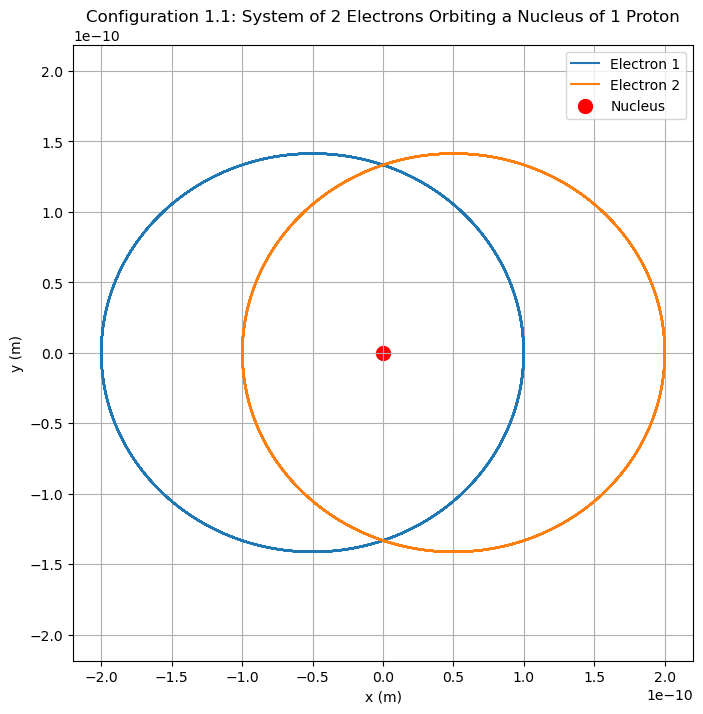

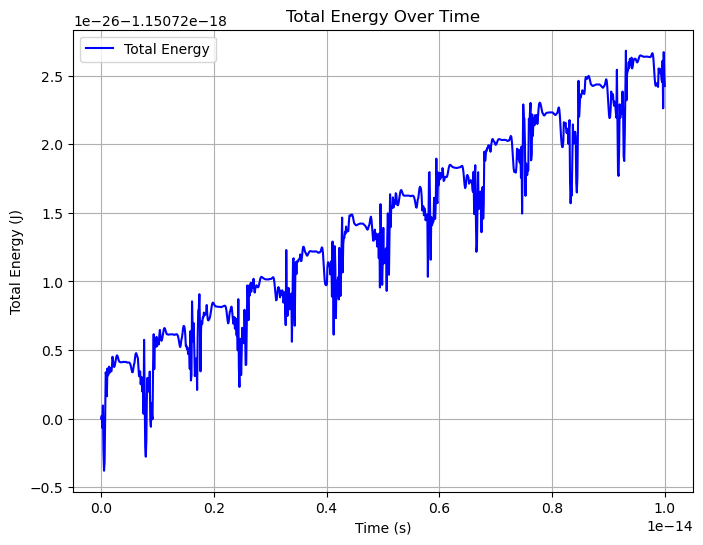

No instability detected in Radial Distances during the simulation.


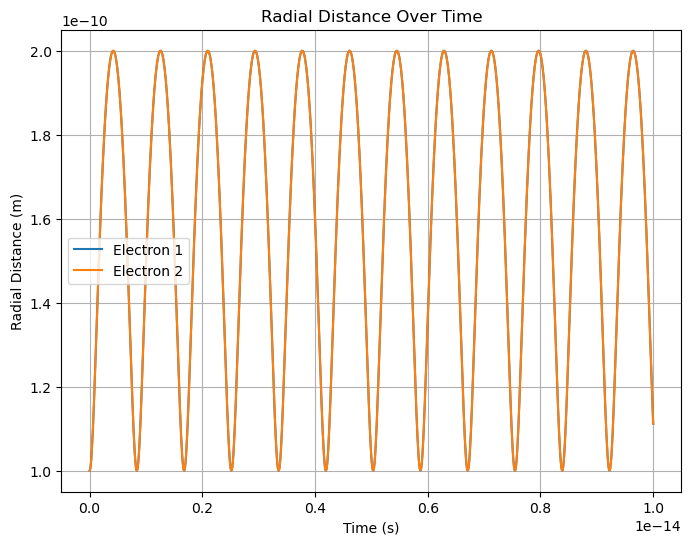

In [2]:
# Configuration 1.1: Perfect Symmetry 
pos = [[1e-10,0.0], [-1e-10, 0.0]]
state = fn_for_initial_state(pos)

run_sim(state, 1.1)

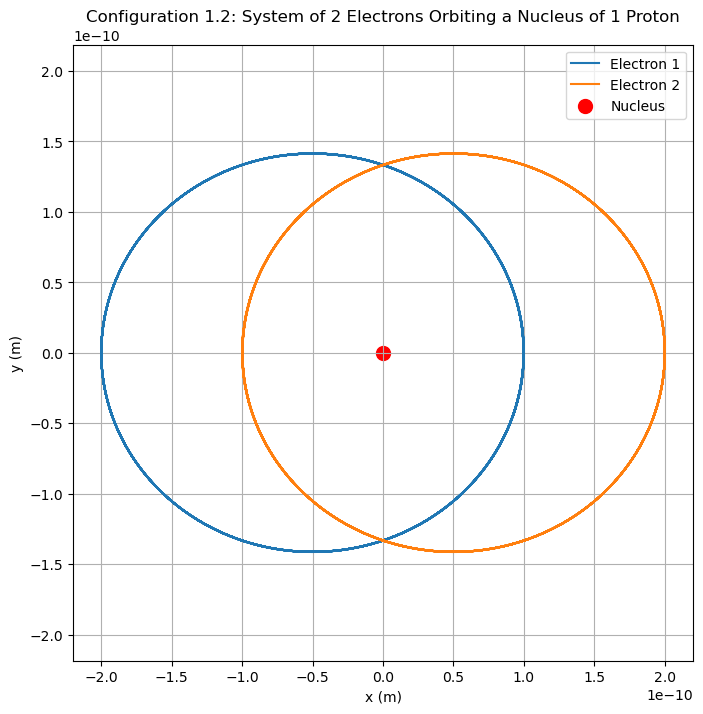

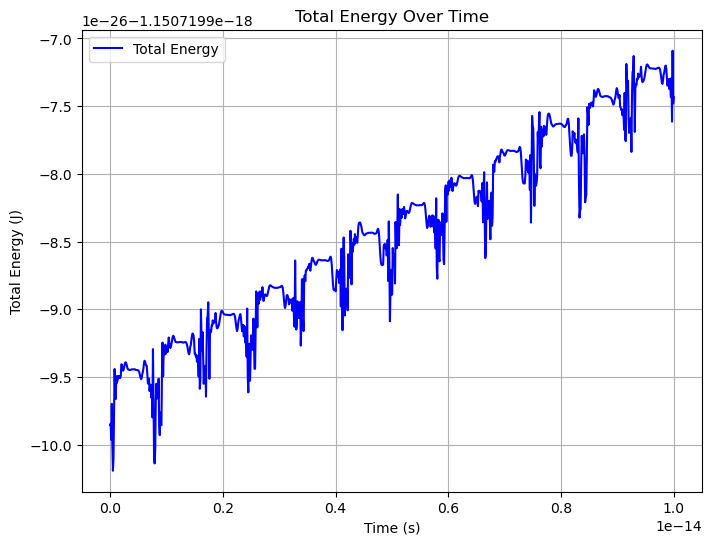

No instability detected in Radial Distances during the simulation.


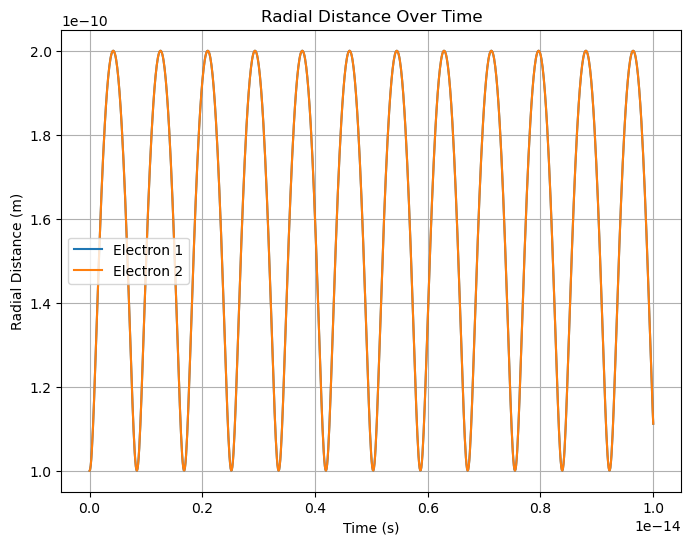

In [3]:
# Configuration 1.2: Varying initial positions
pos = [[1e-10,-5e-15], [-1e-10, 5e-15]]
state = fn_for_initial_state(pos)

run_sim(state, 1.2)

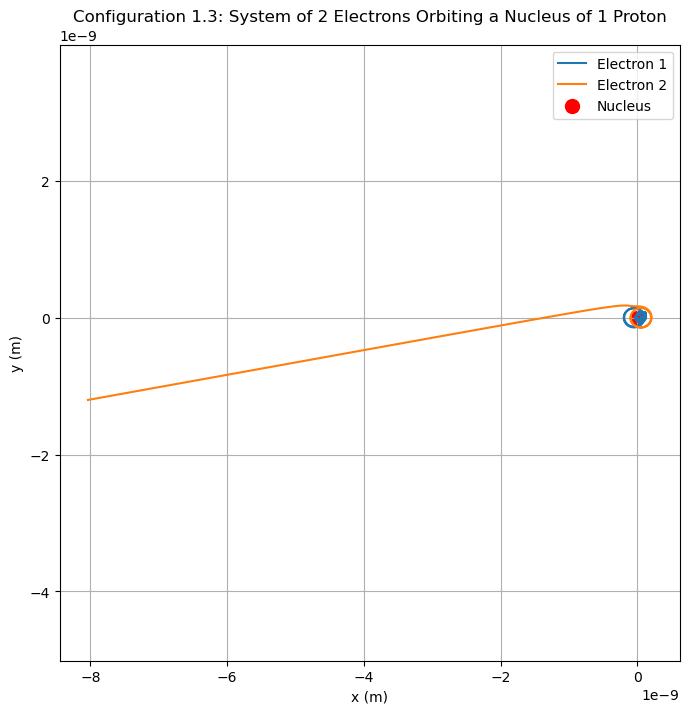

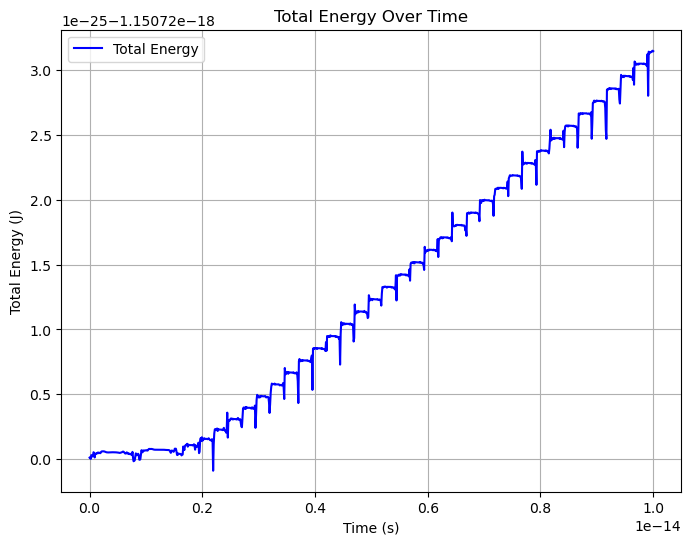

Instability detected in Radial Distances!
Time of instability: 2.57e-15 s
State at instability: [ 1.20169324e-10  4.46096800e-11 -8.44524119e+04  7.11909054e+05
 -9.98989266e-10  6.47237656e-11 -9.62860105e+05 -1.66416687e+05]


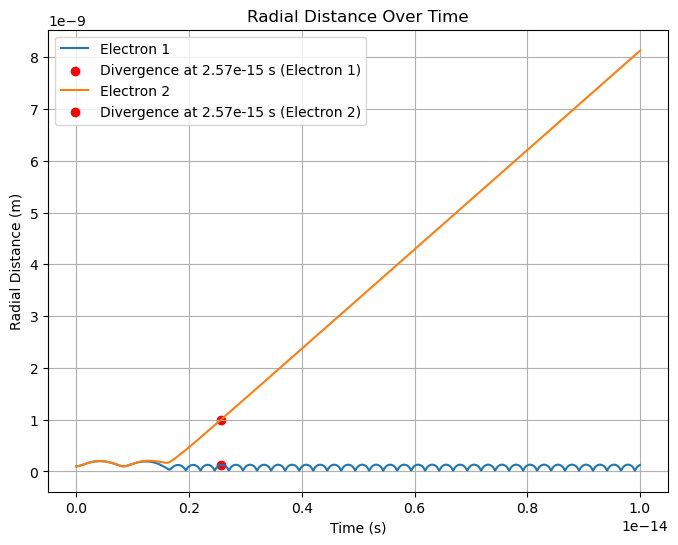

In [4]:
# Configuration 1.3: Varying initial positions by a small margin:
pos = [[1e-10,5e-15], [-1e-10, 0.0]]
state = fn_for_initial_state(pos)

run_sim(state, 1.3)

<center> <h3> <b> Discussion of Results </b> </h3> </center>

Configuration 1.1 models a perfectly symmetrical configuration which in turn resulted in a stable orbit for both electrons. The proton is in between both electrons at equal radial distances. Here, the Total Energy plot shows slight fluctuations potentially as a result of a time interval of $10^{-15}$ s, but extrapolating the overall trend indicates some linearity/constant energy. The Radial Distance plot shows a sinusoidal-like trend with perfect symmetry, and also shows that using radial distance may be an optimal and cleaner way to determine stable orbits.

Configuration 1.2 models an asymmetrical system by introducing an offset in the initial x and y positions of one electron. Configuration 1.3 will show that disturbing the symmetry in the system by a small margin of $5 * 10^{-15}$ m leads to an unstable orbit. By adjusting each offset for both electrons to compensate for each others changes eventually leads to a symmetrical configuration, which in turn leads to a stable orbit.

Configuration 1.3. shows the unmediated configuration of 1.2. Electron 1 only completes one orbit before escaping the system entirely. Because electron 1 escaped the system and no longer exerts electrostatic force on electron 2, electron 2 is able to return to a stable orbit as expected, since the Coloumb force decreases as distance between two point charges increases.  

<center> <h3> <b> Model 2: 2 Electron: 1 Proton System in Time-Dependent Magnetic Field </b> </h3> </center>

Ultimately, the previous results simply confirm the requirement of symmetry for stable orbits in a 3-particle system. Without making the initial velocity independent of position, is there a potential scenario in which a symmetrical configuration no longer guarantees a stable orbit? What if an external force was introduced to the system?

To add an extra parameter to this investigation, a small time-dependent magnetic field with harmonic motion is introduced and fully encapsulates our system. Since magnetic field is tangent to both the horizontal and vertical components, this model will be in the $R^3$ vector space (or simply 3D). 

Field strength amplitude is initially set to $10^{-3}$ T. Earth's magnetic field strength is ~ $5 * 10^{5}$ T, so the initial field strength should not be too many magnitudes higher. Using the equation for cyclotron frequency, an initial $\omega_c$ can be found using the field strength. $$\omega_c = \frac{q B}{m_e} \approxeq 1.5 * 10^{8} rads/s$$ Adding this time-dependent factor into the overall forces acting on this system can offer insight as to how it may destabilize an otherwise stable orbit. 

The choice of tracking the total energy and radial distance changes over time in 2D was made for better readability and visualization comprehension. The changes would remain the same in either dimension, however using 3D would have made the plots harder to interpret and is unnecessary if 2D offers the same fruitful result. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Constants
k = 8.99e9  # Coulomb constant, N·m²/C²
e = 1.6e-19  # Elementary charge, C
m_e = 9.11e-31  # Mass of an electron, kg
nucleus_pos = 0.0,0.0,0.0 # in m

###################################################### HELPER FUNCTIONS FOR run_sim() ######################################################

# Establishing Harmonic Magnetic Field in R^3
def magnetic_field(t):
    """Time-varying magnetic field with components in x, y, and z directions."""
    B0 = 10^-3  # Magnetic field amplitude (T)
    omega = 1.5e8 # Angular frequencies (rad/s)
    Bx = B0 * np.sin(omega * t)
    By = B0 * np.cos(omega * t)
    Bz = B0 * np.sin(omega * t)
    return np.array([Bx, By, Bz])
    
        
# Calculating Magnetic Force on Point Charge 
def lorentz_force(v, B):
    return -e * np.cross(v, B)

# Generalized equations of motion in R^3 
def diff_eqns(t, state):
    """
    Compute the derivatives of state array for a system of electrons.
    Each electron is represented as (xi, yi, zi, vxi, vyi, vzi, ...).
    """
    xp,yp,zp = nucleus_pos
    num_charges = len(state)//6 # 6 components per electron in [state]
    
    diff_outputs = np.zeros_like(state)
    
    for i in range(num_charges):
        B = magnetic_field(t) # Time-dependent B-field
        xi,yi,zi,vxi,vyi,vzi = state[6*i:6*i + 6]
        dx_p,dy_p, dz_p = xi-xp, yi-yp, zi-zp
        
        # Distance between Electron and Proton
        r_p = np.sqrt(dx_p**2 + dy_p**2 + dz_p**2)
        
        if r_p != 0: # Avoid division by zero
            fxp = -k * e**2/r_p**3 * dx_p
            fyp = -k * e**2/r_p**3 * dy_p
            fzp = k * e**2/r_p**3 * dz_p
            
        fxe,fye,fze = 0,0,0 # initialize sum for Electron-Electron force vector
        
        for j in range(num_charges):
            if i == j:
                continue
            xj,yj, zj, vxj,vyj,vzj = state[6*j:6*j + 6]
            dx_ij,dy_ij, dz_ij = xi-xj, yi-yj, zi - zj
            r = np.sqrt(dx_ij**2 + dy_ij**2 + dz_ij**2)
        
            if r != 0:  # Avoid division by zero
                force = k * e**2 / r**3
                fxe += force * dx_ij
                fye += force * dy_ij
                fze += force * dz_ij
        
        # Lorentz force vector 
        B_force = lorentz_force([xi,yi,zi], B)
        
        fx = fxe + fxp + B_force[0]
        fy = fye + fyp + B_force[1]
        fz = fze + fzp + B_force[2]
    
        diff_outputs[6*i] = vxi
        diff_outputs[6*i + 1] = vyi
        diff_outputs[6*i + 2] = vzi
        diff_outputs[6*i + 3] = fx/m_e
        diff_outputs[6*i + 4] = fy/m_e
        diff_outputs[6*i + 5] = fz/m_e
        
    return diff_outputs

# Building initial state array using initial positions of Electrons
def fn_for_initial_state(positions):
    state = []
    for pos in positions:
        x,y,z = pos
        r = np.sqrt(x**2 + y**2 + z**2)
        v_circular = np.sqrt(k * e**2 / (m_e * r))
        state.append(x)
        state.append(y)
        state.append(z)
        state.append(-v_circular * (y/r))
        state.append(v_circular * (x/r))
        state.append(0.0)
    return state

# Radial distance between electron and proton over time calculation
def calculate_radial_distance(sol):
    num_charges = len(sol.y) // 6
    radial_distances = []
    for i in range(num_charges):
        x_traj = sol.y[6 * i]
        y_traj = sol.y[6 * i + 1]
        z_traj = sol.y[6 * i + 2]
        r = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
        radial_distances.append(r)
    return radial_distances

# Plotting radial distance over time using solve_ivp() outputs
# In 2-d for better readibility
def plot_radial_distance(sol, t_eval):
    radial_distances = calculate_radial_distance(sol)
    plt.figure(figsize=(8, 6))
    for i, r in enumerate(radial_distances):
        plt.plot(t_eval, r, label=f'Electron {i + 1}')
    plt.xlabel("Time (s)")
    plt.ylabel("Radial Distance (m)")
    plt.title("Radial Distance Over Time")
    plt.legend()
    plt.grid()
    plt.show()
    
# Calculating total energy over time
def calculate_energy(state):
    """Calculate the total energy of the system."""
    num_charges = len(state) // 6
    KE = 0.0
    PE_ep = 0.0
    PE_ee = 0.0

    # Loop over all particles
    for i in range(num_charges):
        xi, yi, zi, vxi, vyi, vzi = state[6 * i:6 * i + 6]
        pos_i = np.array([xi, yi, zi])
        vel_i = np.array([vxi, vyi, vzi])
        
        # Kinetic Energy
        KE += 0.5 * m_e * np.linalg.norm(vel_i)**2

        # Electron-Proton Potential Energy
        r_ep = np.linalg.norm(pos_i - nucleus_pos)
        if r_ep != 0:
            PE_ep += -k * e**2 / r_ep

        # Electron-Electron Potential Energy
        for j in range(i + 1, num_charges):
            xj, yj, zj = state[6 * j:6 * j + 3]
            pos_j = np.array([xj, yj, zj])
            r_ee = np.linalg.norm(pos_i - pos_j)
            if r_ee != 0:
                PE_ee += k * e**2 / r_ee

    # Total Energy
    total_energy = KE + PE_ep + PE_ee
    return total_energy

    
################################################################# Run simulation ###############################################################
def event1(t,state):
    num_charges = len(state)//6
    r_max = 1e-9  # m, Instability threshold based on Bohr diameter * 10 
    
    # Check radial distance for each electron
    for i in range(num_charges):
        xi, yi, zi = state[6 * i], state[6 * i + 1], state[6 * i + 2]
        r = np.sqrt(xi**2 + yi**2 + zi**2)
        if r >= r_max:
            return r - r_max
    return -1

event1.terminal = False
event1.direction = 1
    
def run_sim(state0, num): # num: to indicate model number
    num_charges = len(state0)//6
    t_span = (0, 10e-15)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    sol = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, events = event1,
                    rtol=1e-9, atol=1e-9)
    
    energies = []
    for i in range(len(t_eval)):
        current_state = sol.y[:, i]
        total_energy = calculate_energy(current_state)
        energies.append(total_energy)
        
    # Creating dimensions for a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting trajectories for each electron
    for i in range(num_charges):
        x_traj = sol.y[6 * i]     # x-coordinates of electron i
        y_traj = sol.y[6 * i + 1] # y-coordinates of electron i
        z_traj = sol.y[6 * i + 2] # z-coordinates of electron i
        ax.plot(x_traj, y_traj, z_traj, label=f'Electron {i + 1}')

    # Plotting the stationary nucleus of 1 proton
    ax.scatter(nucleus_pos[0], nucleus_pos[1], nucleus_pos[2], color='red', label='Nucleus', s=100)

    # Add labels, legend, and grid
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_title(f'Configuration {num}: 3D Electron Trajectories in Magnetic Field')
    ax.legend()
    ax.grid()
    plt.show()
    
    # Plotting total energy:
    plt.figure(figsize=(8, 6))
    plt.plot(t_eval, energies, label='Total Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Energy (J)')
    plt.title('Total Energy Over Time')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Check if instability event occurred
    if sol.t_events[0].size > 0:  
        instability_time = sol.t_events[0][0]
        instability_states = sol.y_events[0][0]
        print("Instability detected in Radial Distances!")
        print(f'Time of instability: {instability_time:.2e} s')
        print(f'State at instability: {instability_states}')
    else:
        print("No instability detected in Radial Distances during the simulation.")

    # Plot radial distances
    radial_distances = calculate_radial_distance(sol)
    plt.figure(figsize=(8, 6))
    for i, r in enumerate(radial_distances):
        plt.plot(t_eval, r, label=f'Electron {i + 1}')

        # Highlight divergence point if an event occurred
        if sol.t_events[0].size > 0:
            closest_index = np.argmin(np.abs(t_eval - instability_time))
            plt.scatter(
                t_eval[closest_index],
                radial_distances[i][closest_index],
                color='red',
                label=f'Divergence at {instability_time:.2e} s (Electron {i + 1})')
        
    plt.xlabel("Time (s)")
    plt.ylabel("Radial Distance (m)")
    plt.title("Radial Distance Over Time")
    plt.legend()
    plt.grid()
    plt.show()

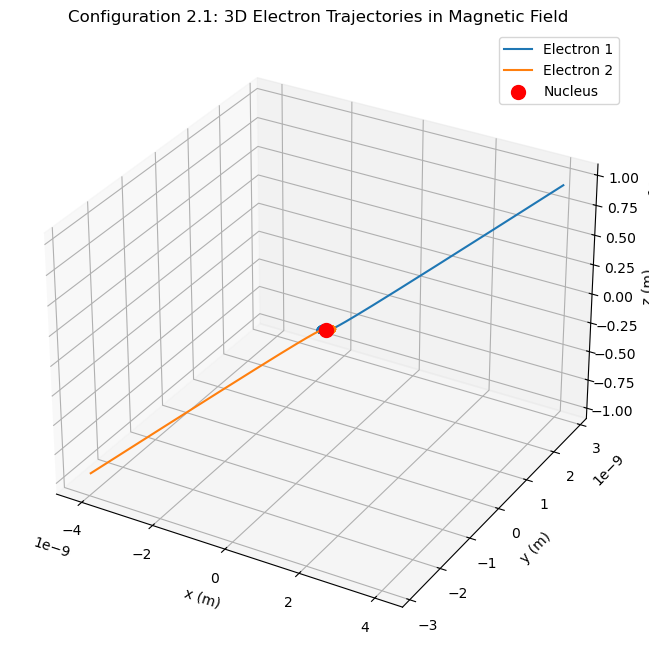

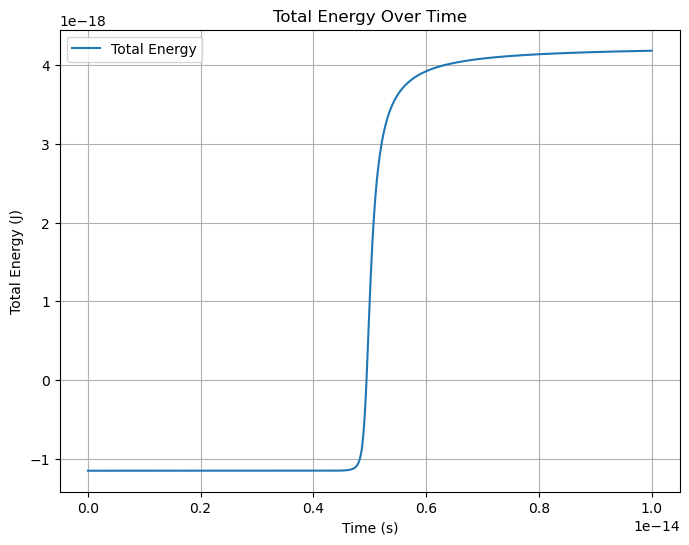

Instability detected in Radial Distances!
Time of instability: 5.47e-15 s
State at instability: [ 4.99583238e-10  1.69048718e-10  9.42961700e-10  8.25474258e+05
  5.97474180e+05  1.80314144e+06 -4.99583238e-10 -1.69048718e-10
 -9.42961700e-10 -8.25474258e+05 -5.97474180e+05 -1.80314144e+06]


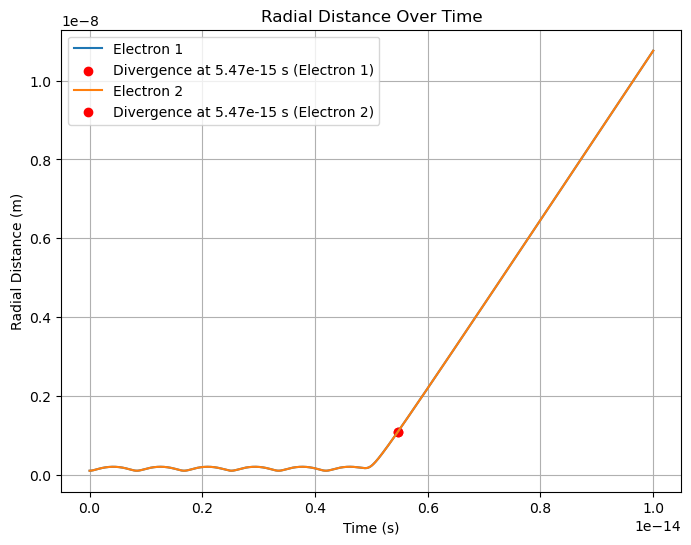

In [6]:
## Configuration 2.1: Perfect Symmetry but unstable orbit
pos = [[1e-10,0.0,0.0], [-1e-10,0.0,0.0]]
state = fn_for_initial_state(pos)
run_sim(state, 2.1)

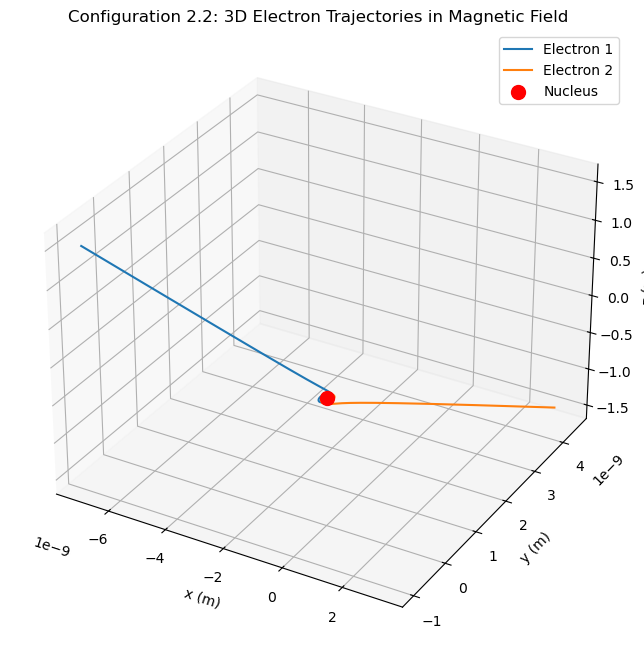

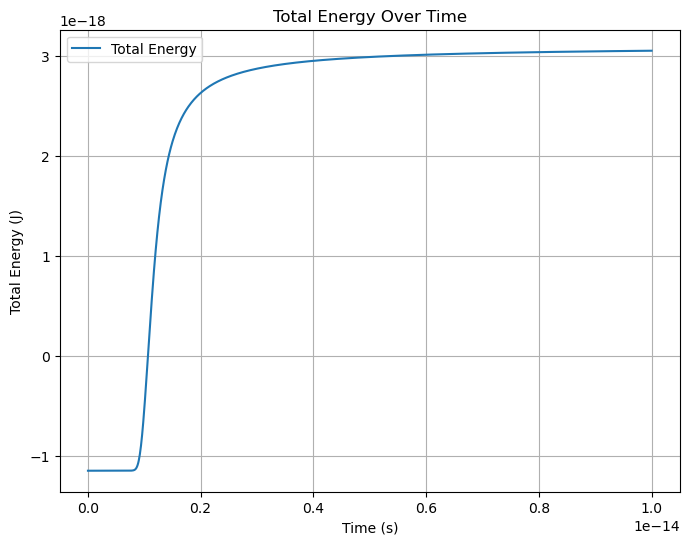

Instability detected in Radial Distances!
Time of instability: 1.60e-15 s
State at instability: [-5.75446162e-10  1.17563521e-10  8.89817426e-10 -8.16417242e+05
 -1.20247013e+05  1.57362474e+06  3.85037260e-10  1.51679087e-10
 -7.48748555e-10  3.74660542e+05  5.44199385e+05 -1.50079496e+06]


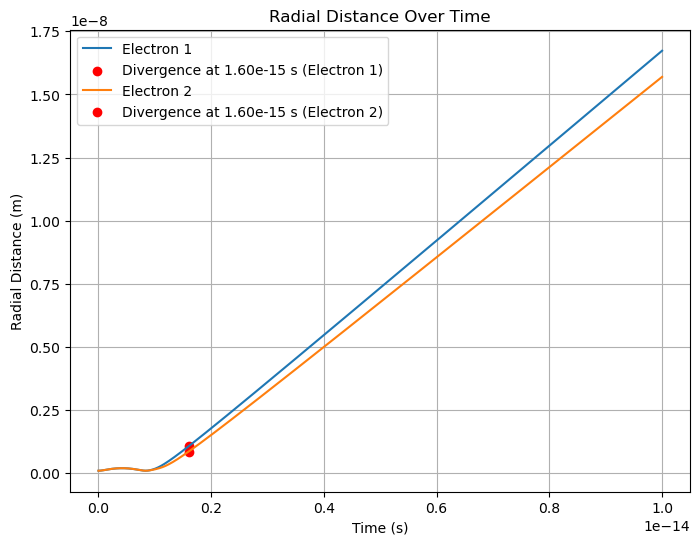

In [7]:
## Configuration 2.2: Varying initial positions by a small offset:
pos = [[1e-10,0.0,5e-15], [-1e-10, 0.0,0.0]]
state = fn_for_initial_state(pos)
run_sim(state, 2.2)

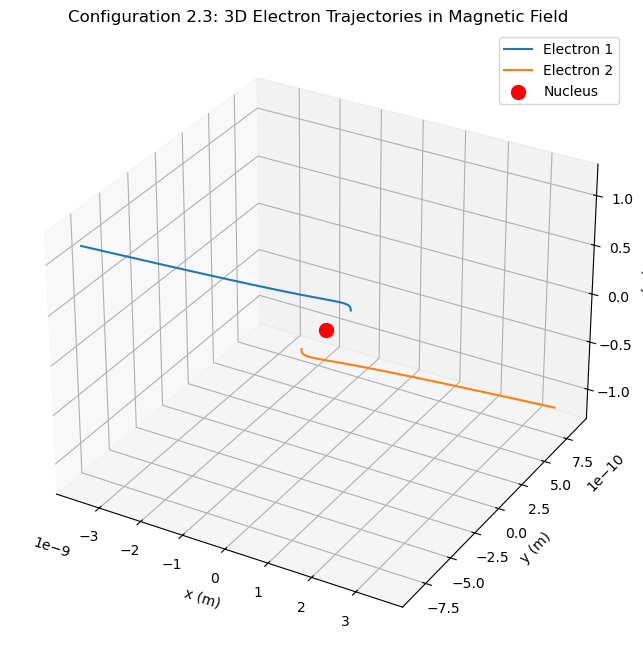

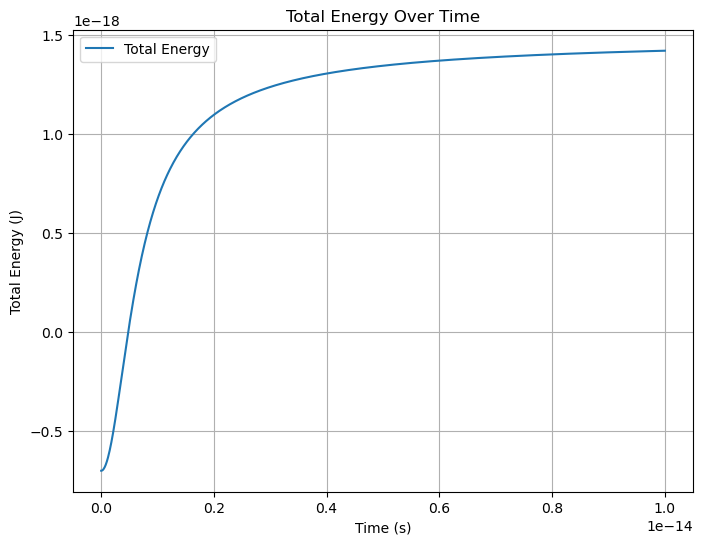

Instability detected in Radial Distances!
Time of instability: 1.00e-15 s
State at instability: [-3.43379915e-10  1.84732722e-10  9.35660613e-10 -3.97044695e+05
 -1.06167994e+05  9.71861865e+05  3.43379915e-10 -1.84732722e-10
 -9.35660613e-10  3.97044695e+05  1.06167994e+05 -9.71861865e+05]


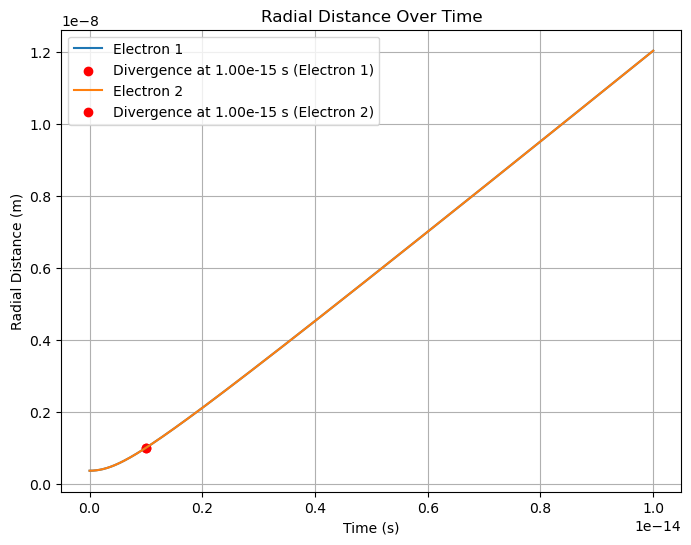

In [8]:
## Configuration 2.3: Varying initial positions with 3D symmetry
pos = [[1e-10,2e-10,3e-10], [-1e-10, -2e-10,-3e-10]]
state = fn_for_initial_state(pos)
run_sim(state, 2.3)

<center> <h3> <b> Discussion of Results </b> </h3> </center>

Configuration 2.1 is the resulting model using the same initial state conditions for the electrons and proton in the nucleus. As observed, the magnetic field caused the symmetrical configuration of the particles to diverge from the stable orbit seen in Configuration 1.1. Analyzing the radial distance plot (energy plot also in agreement), it is shown that the system initially had a stable orbit for about 5 cycles (counting the wave peaks) before it rapidly diverges at ~ $6 * 10^{-15}$ s. 

Comparing the moment of divergence to 2.2, such a small offset of $5e-15$ m in the initial z-position for one of the electrons caused the system to destabilize at ~ $2 * 10^{-15}$ s, similar to 1.3. Opposed to 1.3, electron 2 was still able to return to a stable orbit. In 2.2, both electrons escape at an almost identical trajectory. Since the changing magnetic force is still acting on the system, electron 2 was unable to return to its stable orbit

Configuration 2.3 shows a configuration of opposite and unequal magnitudes for both electrons. In this configuration, divergence occurs at an almost instantaneous rate compared to the previous two plots, at ~ $1 * 10^{-15}$ s. This model was an attempt to see if a completely asymmetric system could potentially sustain a stable orbit. 


To summarize these findings, an oscillating magnetic field can destabilize an electron's orbit because it introduces a time-dependent, non-conservative force into the system. Unlike the Coulomb force, which is conservative and provides a stable potential, the Lorentz force due to the magnetic field varies with time, creating complex dynamics that can lead to orbital instability as shown in the three models.

<center> <h3> <b> Concluding Remarks </b> </h3> </center>

To conclude, this analysis overall aimed to demonstrate that orbital stability in a two-electron system depends significantly on the symmetry of the initial configuration and the absence of external perturbations (subtle changes in state), such as by an oscillating magnetic field.

In Configuration 1.1 (no magnetic field), a perfectly symmetrical setup results in stable orbits, as shown by a (somewhat) consistent total energy and sinusoidal radial distance plots. Introducing small asymmetries in initial positions (Configuration 1.2) causes instability unless adjustments are made to restore symmetry, as seen by the offset in Configuration 1.3, which led to one electron escaping the system. The second electron, no longer influenced by electron-electron Coulomb forces, returns to a stable orbit, consistent with Coulomb force laws.

In Configuration 2.1 (oscillating magnetic field), even symmetrical systems diverge from stable orbits after a brief period. The magnetic Lorentz force introduces a time-dependent, non-conservative component, disrupting the stability from the prior equilibrate system. Small asymmetries in initial positions (Configuration 2.2) accelerate the destabilization, while a completely asymmetric configuration (Configuration 2.3) results in almost immediate orbital divergence, and further highlighting the destabilization effect of an oscillating magnetic field.

These findings confirm that stable orbits require careful symmetry in initial configurations, and are highly sensitive to small perturbations in position. The addition of an oscillating magnetic field fundamentally disrupts stable orbits, causing rapid destabilization as a result of the complex, time-varying forces it introduces.

## References
*(Each reference in this section should include a citation associated with that reference in the body of your project. You may find it helpful to look at a typical Wikipedia page as an example of how to do this. Make sure you include references for source of datas, literature cited, and any python packages used beyond our standard ones. Additionally, you must also cite the sources for any code that you found on the internet or from peers.)*

  
1. OpenStax CNX. (n.d.). University Physics Volume 1. 13.3 Gravitational Potential Energy and Total Energy |   University Physics Volume 1. 
        https://courses.lumenlearning.com/suny-osuniversityphysics/chapter/13-3-gravitational-potential-energy-and-total-energy/
        -----> **Helped explain stable orbit definition** 

3. 1.3 Coulomb’s Law. 1.3 Coulomb’s Law | Texas Gateway. (n.d.).
        https://texasgateway.org/resource/13-coulombs-law -----> **Helped confirm electrostatic formulae as well as validate disregarding proton acceleration**

4. OpenAI. (n.d.-a). Introducing ChatGPT.
        https://openai.com/index/chatgpt/ -----> **Helped debug code segments, especially with nested loops and correctly indexing the arrays**

5. Ünsal, G., & Uzun Ozsahin, D. (2021). Comparison of MRI devices in dentistry. Applications of Multi-Criteria Decision-Making Theories in Healthcare and Biomedical Engineering, 137–151. 
        https://doi.org/10.1016/b978-0-12-824086-1.00009-8 -----> **Helped determine reasonable B-Field strength**
    

## Appendix 1: Code validation

### A1.1: Comparison of simulation results with by-hand calculations

## Simple 1:1 Electron-Proton System:
Before building more a complex Saturnian system, I first wanted to make sure I could establish a stable orbit with just 1 electron first. This helped me to figure out a reasonable time interval and scale for my simulation as well, and make sure that my for-loops and equations implemented into the code produced expected results. This is my template code and I essentially used it as a ground-zero I could go back to when my other code chunks were not working.

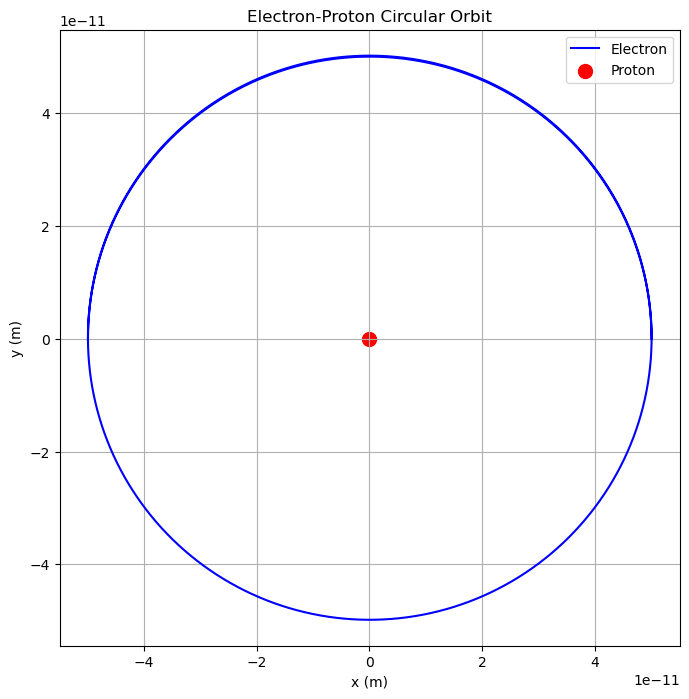

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
k = 8.9875517923e9  # Coulomb constant, N·m²/C²
e = 1.6e-19  # Elementary charge, C
m_e = 9.11e-31  # Mass of an electron, kg
r_initial = 5e-11  # Initial distance, m

# Calculate velocity for a circular orbit
v_circular = np.sqrt(k * e**2 / (m_e * r_initial))
T_orbit = 2 * np.pi * r_initial / v_circular

# Main equations of motion
def diff_eqns(t, state):
    """
    Compute the derivatives of the state tuple for an electron-proton system.
    state = (xe, ye, vxe, vye, xp, yp, vxp, vyp)
    """
    xe, ye, vxe, vye, xp, yp, vxp, vyp = state

    # Relative distance and direction
    dx, dy = xp - xe, yp - ye
    r = np.sqrt(dx**2 + dy**2)
    if r == 0:
        return (0, 0, 0, 0, 0, 0, 0, 0)  # Avoid division by zero

    # Coulomb force magnitude
    force = k * e**2 / r**3

    # Force components
    fx = force * dx
    fy = force * dy

    # Acceleration components
    ax_e = fx / m_e
    ay_e = fy / m_e

    ax_p = -fx / m_p
    ay_p = -fy / m_p

    return (vxe, vye, ax_e, ay_e, vxp, vyp, ax_p, ay_p)

# Initial conditions
m_p = 1.67e-27  # Mass of a proton, kg
state0 = (
    r_initial, 0.0, 0.0, v_circular,  # Electron: x, y, vx, vy
    0.0, 0.0, 0.0, 0.0               # Proton: x, y, vx, vy
)

# Run simulation
def run_sim():
    t_span = (0, 1.5 * T_orbit)  # Simulate for ~1.5 orbital periods
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    sol = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

    # Extract trajectories
    xe_traj, ye_traj = sol.y[0], sol.y[1]
    xp_traj, yp_traj = sol.y[4], sol.y[5]

    # Plot trajectories
    plt.figure(figsize=(8, 8))
    plt.plot(xe_traj, ye_traj, label='Electron', color='blue')
    plt.scatter(0, 0, label='Proton', color='red', s=100)  # Proton fixed at origin
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Electron-Proton Circular Orbit')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

run_sim()

### A1.2: 

### A1.3: 

## Appendix 2: Reflection questions

### Reflection 1: Coding Approaches (A)
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, readable and/or concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project.)*

Coding approaches I used in this project included the use of 2-3 additional helper functions to ensure more efficiency when solve_ivp() is called within the function design. Additionally, I used a few new built in functions both within numpy and Python itself, mainly 'continue' for for-loops, and np.cross(). I relied especially on nested loops as there were instances in my code where I wanted to be able to separately compute the electron-proton force - as well as the electron-electron force because I wanted my array of electron components to be separate from the proton components. A challenge I faced when designing the simulations was the fact that solve_ivp() did not allow me to design the function for diff_eqns() to output a 2d array. I thought that I could find some way around this as I intended for my electron-state array to be 2d for better readability and indexing, but unfortunately I could not bypass this. This is shown in my code, as the indexing is hard to follow as each one had to call upon the correct component by multiplying the indices by 6 (since in 3d, the next electrons components would start at the 6th element).

### Reflection 2: Coding Approaches (B)
*(Highlight an aspect of your code that you feel you did particularily well. Discuss an aspect of your code that would benefit the most from further effort.)*

An aspect of my code I felt accomplished after its implementation was my use of the helper function fn_for_initial_state() to aide in building an electron state array. It takes an initial set of 3d positions, and produces an array of 6 elements corresponding to the initial positions and velocities. Since we are dealing with charges in orbit, it was easiest for me to only have to change 3 initial parameters and produce a reasonable initial velocity rather than changing all 6 parameters. It streamlined the process of testing different parameters, and also ensures that the initial velocity actually corresponds with the initial distance of the charge to improve accuracy. 

An aspect of my code that could have been designed better is the indexing of the charge parameters within my initial state array, as well as appending the corresponding parameters to a working array. There is definitely a more concise and sensible way of selecting the correct elements that I could have discovered if I prioritized it. To mediate this instead of troubleshooting different ways of indexing while maintaining the correct outputs, I chose to explain what the indexing is doing. This allowed me to focus on more important aspects of the simulations which required more debugging and affected the final outcome of the project more. Given more time to focus on smaller details, this will definitely be something to mediate.

### Reflection 3: Simulation phyiscs and investigation (A)
*(How well did you apply and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of.)*

In terms of the physics behind this project, I had to review alot of fundamental concepts in orbital dynamics and electricity and magnetism, which were topics I struggled on in terms of visualizing and comprehending the symmetry of the forces. The more difficult concepts stemmed from having to combine both electrostatic and magnetic forces and then try to establish a stable orbit. Introducing magnetic forces meant switching from 2d to 3d in my simulation. I was not very confident in the set up of my simulation as there could have been other parameters and aspects I was not accounting for that would influence the accuracy of my project. To mediate this, I tried to establish and give as much background information and assumptions corresponding to the scenario, especially regarding what I considered to be the definition of a stable orbit ($\Sigma E < 0$).

### Reflection 4: Simulation phyiscs and investigation (B)
*(Highlight something you feel you did particularily well in terms of the context of your simulation, the physical modelling that you did or the investigation you performed. Discuss an aspect of these dimensions of your project that would benefit the most from further effort.)*

Since I got to struggle with 3d simulations in project #1, it made this project a bit easier when building my 3d plots. I referred to my previous project a little bit in terms of building a clean model, as I had used different colour and legend code snippits in that project. I was only able to make one 3d plot as feedback from project #1 suggested to minimize unnecessary 3d plots if it can offer the same results as a 2d plot.

I also wanted to add a plot showing the radial distance over time as it also can act as a way to determine a stable orbit and tracks where the electrons diverge from a sinusoidal constant radial distance.

### Reflection 5: Effectiveness of your communication
*(Highlight something you feel you did particularily well in your visualizations or written communication. Discuss an aspect of your visualizations or written communication that would benefit the most from further effort.)*

Communicating and writing different summaries and comments has always been the most gratifying part of any project, so I enjoyed being able to justify and structure my paragraphs and overall report in a clean and effective way. I try my best to offer as much background information as possible, as well as justify my choices so that there is as little ambiguity or confusion as possible. For example, I clearly added titles and numbered different formulae and constants to make it easier to differ between topics. Additionally, within my code and visualizations, I add different comments explaining its relevance, as well as legends and big line spacing within my different plots to ensure readability. 

An aspect in this project that could use some improvement would be to maybe layer a plot of the magnetic field oscillations over a plot of the electron orbits to show that when the field is tangent to the electrons motion, thats when the force would be acting on the electron causing it to diverge from its stable orbit. I think that would offer a better visualization and explanation into the effects of the field on the orbits of the electrons in the system.